<a href="https://colab.research.google.com/github/apziko/stroke/blob/main/stroke_project_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn import preprocessing
# !pip install xgboost==1.6.1

## Read DF

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df[df['gender']!='Other'] #remove one outlier
df = df.iloc[:,1:] #remove ID 
df = df[df['work_type']!='Never_worked']
df = df[df['age']>17]

In [ ]:
# bmi_mean = df['bmi'].mean()
# df["bmi"] = df["bmi"].fillna(bmi_mean)
df = df[df['work_type']!='Never_worked']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
for i in df.columns:
  if df[i].dtype == object:
    print(i)
    print(df[i].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age                  28.000
hypertension          0.000
heart_disease         0.000
avg_glucose_level    38.665
bmi                   8.750
stroke                0.000
dtype: float64


In [ ]:
df['avg_glucose_level'].describe()

count    4248.000000
mean      108.522349
std        47.794567
min        55.120000
25%        77.460000
50%        92.465000
75%       116.125000
max       271.740000
Name: avg_glucose_level, dtype: float64

# Visualistaion

## Define outliers



In [ ]:
def df_clean_outliers(df, col):
    for i in df[col]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        if i > Upper_tail or i < Lower_tail:
            df[col] = df[col].replace(i, np.median(df[col]))


In [ ]:

# col = 'avg_glucose_level'
# for i in df[col]:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3-q1
#     Lower_tail = q1 - 1.5 * iqr
#     Upper_tail = q3 + 1.5 * iqr
#     if i > Upper_tail or i < Lower_tail:
#         df[col] = df[col].replace(i, np.mean(df[col]))
    
# df_clean_outliers(df, 'bmi')
# df_clean_outliers(df, 'avg_glucose_level')

In [ ]:
df['bmi'].info()

AttributeError: ignored

#Data preprocesing

## OneClassSVM - Unsupervised Outlier Detection.

In [ ]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(gamma='auto').fit(df[['avg_glucose_level']])
x = clf.predict(df[['avg_glucose_level']])
print(x)


NameError: ignored

In [ ]:
outliers = [1 for i in x if i==-1]
print(sum(outliers))

inliers = [1 for i in x if i==1]
print(sum(inliers))


In [ ]:
clf.score_samples(df[['avg_glucose_level']])

In [ ]:
# df['age']=df_s['age']
# df['bmi']=df_s['bmi']

In [ ]:
# category = pd.cut(df['bmi'], bins=[0,18.5,25,30,50,100], labels=[1, 2, 3, 4, 5])
# category_2 = pd.cut(df['age'], bins=[0,2,17,60,110], labels=[1, 2, 3, 4])
# category_3 = pd.cut(df['avg_glucose_level'], bins=[0,114,140,300])
# df.insert(1, 'age_group', category_2)
# df.insert(2, 'bmi_group', category)
# df.insert(3, 'gluc_group', category_3)

In [ ]:
# df_age = df.pop('age')
# df_bmi = df.pop('bmi')
# df_age = df.pop('age_group')
# df_res = df.pop('Residence_type')

In [ ]:
df.sample(5)

In [ ]:
df[(df['stroke']==0) & (df['ever_married']=='No')]

In [ ]:
df['smoking_status'].value_counts()

In [ ]:
df[df['avg_glucose_level']<100].describe()

In [ ]:
df[df['stroke']==1].describe()

## Split DF to train/test DF

In [ ]:
from sklearn.model_selection import train_test_split
df_to_split = df

df_train, df_test = train_test_split(df_to_split)

df_train = df_train
df_test = df_test


# ## LabelEncoder
# le = preprocessing.LabelEncoder()
# database_ = df_train.select_dtypes(include=(object, 'category')) #select object columns dTypes 
# db_col = list(database_.columns) #names of dType=object colums
# for i in db_col:
#     df_train[i] = le.fit_transform(df_train[i]) #LabelEncoder()
#     df_test[i] = le.transform(df_test[i]) #LabelEncoder()

# X_test = df_test.iloc[:,:-1]
# y_test = df_test['stroke']

# database2_ = df_train.select_dtypes(include=(object, 'category')) #select object columns dTypes 
# db_col_2 = list(database2_.columns) #names of dType=object colums
# for i in db_col_2:
#     df_test[i] = le.transform(df_test[i]) #LabelEncoder()

# from sklearn.preprocessing import StandardScaler #standard scaler na bmi i wieku
# scaler = StandardScaler()

# scal = scaler.fit_transform(df_train[['age', 'bmi']])
# df_s = pd.DataFrame(scal, index=df_train.index, columns=['age', 'bmi'])
# df_train['age']=df_s['age']Season
# df_train['bmi']=df_s['bmi']

# test_scal = scaler.transform(X_test[['age', 'bmi']])
# df_t_s = pd.DataFrame(test_scal, index=X_test.index, columns=['age', 'bmi'])

# X_test['age']=df_t_s['age']
# X_test['bmi']=df_t_s['bmi']


In [ ]:
df_train

In [ ]:
df_test

In [ ]:
df_test['smoking_status'].value_counts()

## OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore', drop='first', dtype='int')
hot_train = enc.fit_transform(df_train.select_dtypes(include=(object, 'category')))
hot_test = enc.transform(df_test.select_dtypes(include=(object, 'category')))

In [ ]:
enc.get_feature_names_out()
# cat = [list(cat) for cat in enc.categories_]
# cat = [item for sublist in enc.get_feature_names_out() for item in sublist]
cat = [cat for cat in enc.get_feature_names_out()]

In [ ]:
cat

In [ ]:
hot_train.toarray()

In [ ]:
# cat_2 = [item for sublist in cat for item in sublist]

In [ ]:
cat

In [ ]:
df_train_enc = pd.DataFrame(hot_train.toarray(), columns=cat)
df_test_enc = pd.DataFrame(hot_test.toarray(), columns=cat)

In [ ]:
# df.loc[[3809]]

In [ ]:
df_train.info()

In [ ]:
df_temp_train = df_train.select_dtypes(include=(int, float))
df_temp_test = df_test.select_dtypes(include=(int, float))

In [ ]:
# df_temp_train = df_temp_train.reset_index()
# df_temp_test = df_temp_test.reset_index()
# df_train_enc = df_train_enc.reset_index()
# df_test_enc = df_test_enc.reset_index()

In [ ]:
df_train_enc

In [ ]:
# df_train_enc #.reset_index(drop=True, inplace=True)
# df_temp_train# .reset_index(drop=True, inplace=True)

In [ ]:
df_train_enc

In [ ]:
df_temp_train

In [ ]:
# df_train = pd.merge([df_train_enc, df_temp_train])
#df_train = pd.merge(df_train_enc, df_temp_train, ignore_index=True)
# df_train = df_train_enc.join(df_temp_train, ignore_index=True)

In [ ]:
for column in df_temp_train:
    df_train_enc[column] = df_temp_train[column].tolist()
    
df_train = df_train_enc
    
# for column in df_temp_test:
#     df_test_enc[column] = df_temp_test[column].tolist()   

In [ ]:
for col in df_temp_test:
    df_test_enc[col] = df_temp_test[col].tolist()
    
df_test = df_test_enc

In [ ]:
df_test_enc.info()

In [ ]:
df_train_enc

In [ ]:
# df_train = df_train_enc.merge(df_temp_train, left_index=True, right_index=True)
# df_test = df_test_enc.merge(df_temp_test, left_index=True, right_index=True)

In [ ]:
df[(df['age']==75.0) & (df['avg_glucose_level'] == 219.82)]

In [ ]:
# df[(df['age']==75.0) & (df['avg_glucose_level'] == 219.82)]
df_test[(df_test['age']==75.0) & (df_test['avg_glucose_level'] == 219.82)]

In [ ]:
# x = 3600
# df.loc[[x]]


In [ ]:
# df_train.loc[[x]]

In [ ]:
# df_train = df_train.reset_index()

In [ ]:
# df_test = df_test.reset_index()

In [ ]:
#KNN imputer

In [ ]:
df_train

## KNNImputer for NaN

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_train_ = df_train.iloc[:,0:19]
df_test_ = df_test.iloc[:,0:19]
bmi_train = imputer.fit_transform(df_train_)
bmi_test = imputer.transform(df_test_)

In [ ]:
df_bmi_train = pd.DataFrame(bmi_train)
df_bmi_test = pd.DataFrame(bmi_test)

In [ ]:
df_bmi_train

In [ ]:
df_bmi_train.iloc[:,12]

In [ ]:
df_train['bmi'] = df_bmi_train.iloc[:,12].tolist()
df_test['bmi'] = df_bmi_test.iloc[:,12].tolist()

In [ ]:
df_train


In [ ]:
df_test

In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

In [ ]:
# df_clean_outliers(df_train, 'bmi')
# df_clean_outliers(df_train, 'avg_glucose_level')

# df_clean_outliers(df_test, 'bmi')
# df_clean_outliers(df_test, 'avg_glucose_level')

In [ ]:
df_train.describe()

## Discretization

In [ ]:
def discretization(df):
    category = pd.cut(df['bmi'], bins=[0,18.5,25,30,50,85,100], labels=[-2, 1, 2, 3, 4, 5])
    category_2 = pd.cut(df['age'], bins=[0,30,40,60,80,110], labels=[1, 2, 3, 4, 5])
    category_3 = pd.cut(df['avg_glucose_level'], bins=[0,70,114,140,300], labels=[-2, 1, 2, 3])
    df.insert(0, 'age_group', category_2.astype(int))
    df.insert(1, 'bmi_group', category.astype(int))
    df.insert(2, 'gluc_group', category_3.astype(int))

In [ ]:
discretization(df_train)
discretization(df_test)
df_train = df_train.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1)
df_test = df_test.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1)

In [ ]:
df_test

## Undersampling

In [ ]:
from sklearn.utils import resample
df_majority = df_train[df_train['stroke'] == 0]
df_minority = df_train[df_train['stroke'] == 1]

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample with replacement
                                   n_samples=200,    # to match majority class
                                   random_state=42)  # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled['stroke'].value_counts()

In [ ]:
X_train = df_downsampled.iloc[:,:-1]
y_train = df_downsampled['stroke']
X_test = df_test.iloc[:,:-1]
y_test = df_test['stroke']

In [ ]:
# X_train = df_train.iloc[:,:-1]
# y_train = df_train['stroke']
# X_test = df_test.iloc[:,:-1]
# y_test = df_test['stroke']

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# from sklearn.preprocessing import StandardScaler #standard scaler na bmi i wieku
# scaler = StandardScaler()

# scal = scaler.fit_transform(X_train[['age', 'bmi', 'avg_glucose_level']])
# df_s = pd.DataFrame(scal, index=X_train.index, columns=['age', 'bmi', 'avg_glucose_level'])
# X_train['age']=df_s['age']
# X_train['bmi']=df_s['bmi']
# X_train['avg_glucose_level']=df_s['avg_glucose_level']

# test_scal = scaler.transform(X_test[['age', 'bmi', 'avg_glucose_level']])
# df_t_s = pd.DataFrame(test_scal, index=X_test.index, columns=['age', 'bmi', 'avg_glucose_level'])

# X_test['age']=df_t_s['age']
# X_test['bmi']=df_t_s['bmi']
# X_test['avg_glucose_level']=df_t_s['avg_glucose_level']



In [ ]:
# from sklearn.preprocessing import StandardScaler #standard scaler na bmi i wieku
# scaler = StandardScaler()

# scal = scaler.fit_transform(X_train[['age_group', 'bmi_group', 'gluc_group']])
# df_s = pd.DataFrame(scal, index=X_train.index, columns=['age_group', 'bmi_group', 'gluc_group'])

# X_train.loc[:,'age_group']=df_s['age_group'].tolist()
# X_train.loc[:,'bmi_group']=df_s['bmi_group'].tolist()
# X_train.loc[:,'gluc_group']=df_s['gluc_group'].tolist()

# test_scal = scaler.transform(X_test[['age_group', 'bmi_group', 'gluc_group']])
# df_t_s = pd.DataFrame(test_scal, index=X_test.index, columns=['age_group', 'bmi_group', 'gluc_group'])

# X_test.loc[:,'age_group']=df_t_s['age_group'].tolist()
# X_test.loc[:,'bmi_group']=df_t_s['bmi_group'].tolist()
# X_test.loc[:,'gluc_group']=df_t_s['gluc_group'].tolist()

In [ ]:
X_train

In [ ]:
X_test.info()

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
# X_train = X_train.drop('age_group', axis=1)
# X_test = X_test.drop('age_group', axis=1)

In [ ]:
# X_train = X_train.drop('ever_married_Yes', axis=1)
# X_test = X_test.drop('ever_married_Yes', axis=1)


In [ ]:
X_train

# Quality metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def model_quality(y_test, y_pred):
  
  print(f'Accuracy: \n {accuracy_score(y_test, y_pred)}')

  print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

  print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

# ML models

## XGBoost

In [ ]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [ ]:
from xgboost import XGBClassifier
import xgboost as gb
xgb = XGBClassifier() #regularyzacja l1: reg_alpha=0.9, l2: reg_lambda=0.4

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)

AttributeError: ignored

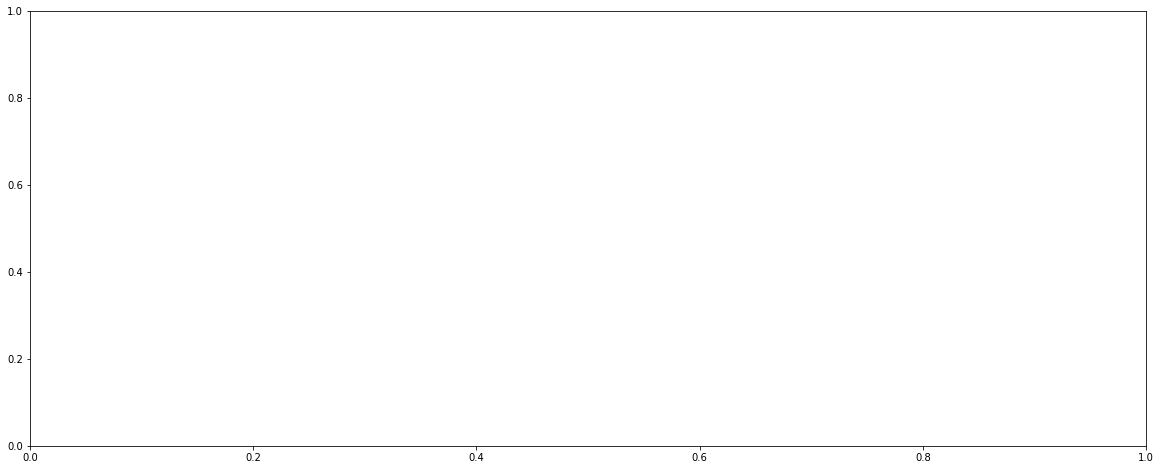

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(xgb.feature_names_in_, xgb.feature_importances_)
fig.tight_layout()

plt.show()

In [ ]:
class_weight_xgb = {}
for i in range(len(X_train.columns)):
    class_weight_xgb[i] = xgb.feature_importances_[i]
print(class_weight_xgb)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'reg_alpha':[0, 0.1, 0.4, 0.6, 1], 'reg_lambda':[0, 0.1, 0.4, 0.6, 1]}
xgb = XGBClassifier() #regularyzacja l1: reg_alpha=0.9, l2: reg_lambda=0.4
gs = GridSearchCV(estimator=xgb, param_grid=params, scoring = 'recall')
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
model_quality(y_test, y_pred)

Accuracy: 
 0.6826741996233522
Confusion Matrix: 
 [[673 317]
 [ 20  52]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.68      0.80       990
           1       0.14      0.72      0.24        72

    accuracy                           0.68      1062
   macro avg       0.56      0.70      0.52      1062
weighted avg       0.91      0.68      0.76      1062



In [ ]:
model_quality(y_test, y_pred)

Accuracy: 
 0.6826741996233522
Confusion Matrix: 
 [[673 317]
 [ 20  52]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.68      0.80       990
           1       0.14      0.72      0.24        72

    accuracy                           0.68      1062
   macro avg       0.56      0.70      0.52      1062
weighted avg       0.91      0.68      0.76      1062



## RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, max_features=2, max_depth=7, class_weight={0:.5, 1:1}) 

rfc.fit(X_train, y_train)
y_pred_f = rfc.predict(X_test)

In [ ]:
model_quality(y_test, y_pred_f)

Accuracy: 
 0.5009416195856874
Confusion Matrix: 
 [[478 512]
 [ 18  54]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.48      0.64       990
           1       0.10      0.75      0.17        72

    accuracy                           0.50      1062
   macro avg       0.53      0.62      0.41      1062
weighted avg       0.90      0.50      0.61      1062



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[5,6,7,8,9,10], 'max_features':[2,3,4,5], 'max_depth':[3,4,5,6]}
gs = GridSearchCV(estimator=rfc, param_grid=params, scoring = 'recall')

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 0.5, 1: 1},
                                              max_depth=7, max_features=2,
                                              n_estimators=10),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [ ]:
gs.best_params_

{'max_depth': 3, 'max_features': 2, 'n_estimators': 7}

In [ ]:
y_pred = gs.predict(X_test)

In [ ]:
model_quality(y_test, y_pred)

Accuracy: 
 0.3775894538606403
Confusion Matrix: 
 [[332 658]
 [  3  69]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.34      0.50       990
           1       0.09      0.96      0.17        72

    accuracy                           0.38      1062
   macro avg       0.54      0.65      0.34      1062
weighted avg       0.93      0.38      0.48      1062



In [ ]:
# from yellowbrick.model_selection import ValidationCurve

# viz = ValidationCurve(
#     rfc, param_name="min_samples_split",
#     param_range=np.arange(1, 20, 1), cv=3)
# viz.fit(X_train, y_train)
# viz.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
params = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.03, 0.04, 0.05, 0.6, 0.1,0.9, 1, 1.1, 1.2,1.5, 1.6 ], 'class_weight' : [{0:.8, 1:1}]}
gs = GridSearchCV(estimator=lr, param_grid=params) #, scoring = 'recall')

In [ ]:
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.03, 0.04, 0.05, 0.6, 0.1,
                               0.9, 1, 1.1, 1.2, 1.5, 1.6],
                         'class_weight': [{0: 0.8, 1: 1}],
                         'penalty': ['l1', 'l2']})

In [ ]:
gs.score(X_train, y_train)

0.7226666666666667

In [ ]:
gs.score(X_test, y_test)

0.6779661016949152

In [ ]:
gs.best_params_

{'C': 0.03, 'class_weight': {0: 0.8, 1: 1}, 'penalty': 'l2'}

In [ ]:
y_pred = gs.predict(X_test)

In [ ]:
model_quality(y_test, y_pred)

Accuracy: 
 0.6779661016949152
Confusion Matrix: 
 [[662 328]
 [ 14  58]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.67      0.79       990
           1       0.15      0.81      0.25        72

    accuracy                           0.68      1062
   macro avg       0.56      0.74      0.52      1062
weighted avg       0.92      0.68      0.76      1062



## Voting Classifier

In [ ]:
lr = LogisticRegression(C = 1, penalty='l1', solver='liblinear', class_weight= {0:.4, 1:1})
rfc = RandomForestClassifier(n_estimators=12, max_features=6, max_depth=4, class_weight={0:.4, 1:1}) 
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
xgb = XGBClassifier()
# from sklearn.pipeline import Pipeline
# pipe = Pipeline([('lr', LogisticRegression(class_weight='balanced', C=1, penalty='l1', solver='saga')), 
#                  ('rfc', RandomForestClassifier(class_weight='balanced', n_estimators=9, max_features=6, max_depth=4))])
# pipe.fit(X_train, y_train)
# pipe.score(X_test, y_test)
eclf1 = VotingClassifier(estimators=[('lr', lr), ('rfc', rfc), ('gnb', gnb), ('xgb', xgb)], voting='soft', weights=[3,2,1,1], flatten_transform=True)
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)
model_quality(y_test, y_pred)

Accuracy: 
 0.53954802259887
Confusion Matrix: 
 [[511 479]
 [ 10  62]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.52      0.68       990
           1       0.11      0.86      0.20        72

    accuracy                           0.54      1062
   macro avg       0.55      0.69      0.44      1062
weighted avg       0.92      0.54      0.64      1062



In [ ]:
eclf1.score(X_train, y_train)

0.6986666666666667

In [ ]:
eclf1.score(X_test, y_test)

0.53954802259887

## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', probability=False, class_weight={0:.5, 1:1})
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
model_quality(y_test, y_pred)

Accuracy: 
 0.5037664783427496
Confusion Matrix: 
 [[472 518]
 [  9  63]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.48      0.64       990
           1       0.11      0.88      0.19        72

    accuracy                           0.50      1062
   macro avg       0.54      0.68      0.42      1062
weighted avg       0.92      0.50      0.61      1062



In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = 'recall')

scores



array([0.83333333, 0.66666667, 0.77777778, 0.55555556, 0.77777778,
       0.76470588, 0.94117647, 0.70588235, 0.64705882, 0.64705882])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
clf = svm.SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
y_pred = cross_val_predict(clf, X_test, y_test, cv=5)
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
conf_mat

array([[990,   0],
       [ 72,   0]])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
y_pred = clf.predict(X_test)
model_quality(y_test, y_pred)

Accuracy: 
 0.7222222222222222
Confusion Matrix: 
 [[716 274]
 [ 21  51]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.72      0.83       990
           1       0.16      0.71      0.26        72

    accuracy                           0.72      1062
   macro avg       0.56      0.72      0.54      1062
weighted avg       0.92      0.72      0.79      1062



In [ ]:
# dodac dyskretyzacje i cross walidacje, sprawdzic PCA i SVM i KNNimputer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier()

clf.fit(X_train, y_train)


AdaBoostClassifier()

In [ ]:
y_pred = clf.predict(X_test)
model_quality(y_test, y_pred)

Accuracy: 
 0.7128060263653484
Confusion Matrix: 
 [[708 282]
 [ 23  49]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.72      0.82       990
           1       0.15      0.68      0.24        72

    accuracy                           0.71      1062
   macro avg       0.56      0.70      0.53      1062
weighted avg       0.91      0.71      0.78      1062



In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def cross_validate(classifier, kfold, X, y, X_t, y_t, params=None, talk=True):
    X = np.concatenate(X, X_t)
    y = np.concatenate(y, y_t)
    if params is None:
        params = {}
    if classifier.__class__.__name__ == 'ABCMeta':
        clf = classifier(**params)
    else:
        clf = classifier
    predicted = []
    target = []

    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X=X_train, y=y_train)
        predicted = np.concatenate((predicted, clf.predict(X_test)))
        target = np.concatenate((target, y_test))
    
    model_quality(target, predicted)
    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cross_validate(DecisionTreeClassifier, StratifiedKFold(10), X_train, y_train, X_test, y_test)

TypeError: ignored